# Importing Libraries

**Pandas** for Data Manipulation
**Numpy** for numerical Calculations
**Matplotlib**and **seaborn** have been used for Data visualization

In [830]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [831]:
#Reading Dataset
car = pd.read_csv('C:/Users/koki/Downloads/Kok/Sport car price.csv')
print(car)

         Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1004      McLaren     Senna  2021               4        789            590   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696   

     0-60 MPH Time (seconds) Price (in USD)  
0    

**Shape** will display the number of rows and columns in the dataset

In [832]:
car.shape

(1007, 8)

There are 1007 tuples and 8 attributes in our dataset.

**data.info()**  shows the attribute's Datatype, Missing values in attributes

In [833]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


1)Numerical Attributes:Year 

2)Categorical Atrributes: Car Make, Car Model, Engine Size (L), Horsepower, Torque (lb-ft), 0-60 MPH Time (seconds),Price (in USD).

3)Engine Size(L), Torque (lb-ft)  attributes have missing value

# Checking for Duplication

**nunique()** returns unique values from each column and  Duplicated data can be handled or removed based on further analysis

In [834]:
car.nunique()

Car Make                    38
Car Model                  176
Year                         9
Engine Size (L)             45
Horsepower                 124
Torque (lb-ft)              93
0-60 MPH Time (seconds)     43
Price (in USD)             367
dtype: int64

The dataset contains different unique values for each feature, such as 38 car brands, 176 car models, and 367 different car prices. This shows the variety of data for each attribute like engine size, horsepower, and year.

In [835]:
Duplicated_value = car.duplicated()
print(Duplicated_value)
Duplicated_value.sum()

0       False
1       False
2       False
3       False
4       False
        ...  
1002    False
1003    False
1004     True
1005    False
1006    False
Length: 1007, dtype: bool


288

This shows that 288 rows in the dataset are duplicates.

**drop_duplicates()** we can remove duplicate values from dataset

In [836]:
car.drop_duplicates(inplace=True)
Duplicated_value = car.duplicated()
print(Duplicated_value)
Duplicated_value.sum()


0       False
1       False
2       False
3       False
4       False
        ...  
999     False
1002    False
1003    False
1005    False
1006    False
Length: 719, dtype: bool


0


After removing the duplicates, we cleaned up the dataset by deleting 288 duplicate rows, leaving only unique data.

# Checking for Missing Values

we can check for missing data in a dataset using the **isnull().sum()** method and  check data contain Null values in dataset



In [837]:
car.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

 We can see that Engine Size (L) and Torque (lb-ft)   has Missing values 

#Replace with mode values – We can do this in the case of a Categorical feature.

In [838]:
car['Engine Size (L)'].fillna(car['Engine Size (L)'].mode()[0],inplace=True)
print(car['Engine Size (L)'].head(5))
car.isnull().sum()

0      3
1    5.2
2    3.9
3    5.2
4      4
Name: Engine Size (L), dtype: object


Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             3
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [839]:
car['Torque (lb-ft)'].fillna(car['Torque (lb-ft)'].mode()[0],inplace=True)
print(car['Torque (lb-ft)'].head(5))
car.isnull().sum()

0    331
1    443
2    561
3    406
4    568
Name: Torque (lb-ft), dtype: object


Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

**describe()** method shows the basic statistical characteristics of numercial attributes(float63, int64):Mean, Median,Mode, Count, Standard deviation,0.25,0.50,0.75 quartiles.

In [840]:
car.describe()

,Year
count,719.000000
mean,2021.159944
std,2.329598
min,1965.000000
25%,2021.000000
50%,2021.000000
75%,2022.000000
max,2023.000000


**Renaming columns** in a dataset is to make their names more meaningful and easier to understand.

In [841]:
# Renaming for columns
car = car.rename(columns={'Engine Size (L)': 'Engine Size','Torque (lb-ft)':'Torque','0-60 MPH Time (seconds)':'MPH','Car Make':'Car Name','Price (in USD)': 'Price' })
print(car)

         Car Name Car Model  Year     Engine Size Horsepower Torque   MPH  \
0         Porsche       911  2022               3        379    331     4   
1     Lamborghini   Huracan  2021             5.2        630    443   2.8   
2         Ferrari   488 GTB  2022             3.9        661    561     3   
3            Audi        R8  2022             5.2        562    406   3.2   
4         McLaren      720S  2021               4        710    568   2.7   
...           ...       ...   ...             ...        ...    ...   ...   
999        Nissan      370Z  2021             3.7        332    270   5.1   
1002   Koenigsegg     Jesko  2022               5       1280   1106   2.5   
1003        Lotus     Evija  2021  Electric Motor       1972   1254     2   
1005       Pagani    Huayra  2021               6        764    738     3   
1006        Rimac    Nevera  2021  Electric Motor       1888   1696  1.85   

          Price  
0       101,200  
1       274,390  
2       333,750  
3  

The column names were changed as follows: 'Engine Size (L)' to 'Engine Size', 'Torque (lb-ft)' to 'Torque', '0-60 MPH Time (seconds)' to 'MPH', 'Car Make' to 'Car Name', and 'Price (in USD)' to 'Price'.

Wanted to convert specific columns in our dataset to the nearest integer

In [842]:
car_df= pd.DataFrame(car) 
columns_to_convert = ['Engine Size', 'Horsepower', 'Torque', 'Price', 'MPH'] 
#car[columns_to_convert] = car[columns_to_convert].apply(lambda x: x.round().astype(int))
print(car_df)
print(car[columns_to_convert].head())

         Car Name Car Model  Year     Engine Size Horsepower Torque   MPH  \
0         Porsche       911  2022               3        379    331     4   
1     Lamborghini   Huracan  2021             5.2        630    443   2.8   
2         Ferrari   488 GTB  2022             3.9        661    561     3   
3            Audi        R8  2022             5.2        562    406   3.2   
4         McLaren      720S  2021               4        710    568   2.7   
...           ...       ...   ...             ...        ...    ...   ...   
999        Nissan      370Z  2021             3.7        332    270   5.1   
1002   Koenigsegg     Jesko  2022               5       1280   1106   2.5   
1003        Lotus     Evija  2021  Electric Motor       1972   1254     2   
1005       Pagani    Huayra  2021               6        764    738     3   
1006        Rimac    Nevera  2021  Electric Motor       1888   1696  1.85   

          Price  
0       101,200  
1       274,390  
2       333,750  
3  

In [843]:
#Columns to be converted for nearest int
print(car[columns_to_convert].head())

  Engine Size Horsepower Torque    Price  MPH
0           3        379    331  101,200    4
1         5.2        630    443  274,390  2.8
2         3.9        661    561  333,750    3
3         5.2        562    406  142,700  3.2
4           4        710    568  298,000  2.7


In [844]:
#Converting columns to nearest float or int datatype to do further analysis
print(car[~car[columns_to_convert].applymap(lambda x: isinstance(x, (int, float))).all(axis=1)])

         Car Name Car Model  Year     Engine Size Horsepower Torque   MPH  \
0         Porsche       911  2022               3        379    331     4   
1     Lamborghini   Huracan  2021             5.2        630    443   2.8   
2         Ferrari   488 GTB  2022             3.9        661    561     3   
3            Audi        R8  2022             5.2        562    406   3.2   
4         McLaren      720S  2021               4        710    568   2.7   
...           ...       ...   ...             ...        ...    ...   ...   
999        Nissan      370Z  2021             3.7        332    270   5.1   
1002   Koenigsegg     Jesko  2022               5       1280   1106   2.5   
1003        Lotus     Evija  2021  Electric Motor       1972   1254     2   
1005       Pagani    Huayra  2021               6        764    738     3   
1006        Rimac    Nevera  2021  Electric Motor       1888   1696  1.85   

          Price  
0       101,200  
1       274,390  
2       333,750  
3  

In [845]:
print(car[~car[columns_to_convert].applymap(lambda x: isinstance(x, (int, float))).all(axis=1)])

         Car Name Car Model  Year     Engine Size Horsepower Torque   MPH  \
0         Porsche       911  2022               3        379    331     4   
1     Lamborghini   Huracan  2021             5.2        630    443   2.8   
2         Ferrari   488 GTB  2022             3.9        661    561     3   
3            Audi        R8  2022             5.2        562    406   3.2   
4         McLaren      720S  2021               4        710    568   2.7   
...           ...       ...   ...             ...        ...    ...   ...   
999        Nissan      370Z  2021             3.7        332    270   5.1   
1002   Koenigsegg     Jesko  2022               5       1280   1106   2.5   
1003        Lotus     Evija  2021  Electric Motor       1972   1254     2   
1005       Pagani    Huayra  2021               6        764    738     3   
1006        Rimac    Nevera  2021  Electric Motor       1888   1696  1.85   

          Price  
0       101,200  
1       274,390  
2       333,750  
3  

In [846]:
#Attributes in our dataset
print(car.columns)


Index(['Car Name', 'Car Model', 'Year', 'Engine Size', 'Horsepower', 'Torque',
       'MPH', 'Price'],
      dtype='object')


In [847]:
# Remove commas from the 'Price' column and convert to integers
car['Price'] = car['Price'].str.replace(',', '').astype(float)
print(car['Price'].head())


0    101200.0
1    274390.0
2    333750.0
3    142700.0
4    298000.0
Name: Price, dtype: float64


In [848]:
print(car.head())  # Print the first few rows to inspect the data


      Car Name Car Model  Year Engine Size Horsepower Torque  MPH     Price
0      Porsche       911  2022           3        379    331    4  101200.0
1  Lamborghini   Huracan  2021         5.2        630    443  2.8  274390.0
2      Ferrari   488 GTB  2022         3.9        661    561    3  333750.0
3         Audi        R8  2022         5.2        562    406  3.2  142700.0
4      McLaren      720S  2021           4        710    568  2.7  298000.0


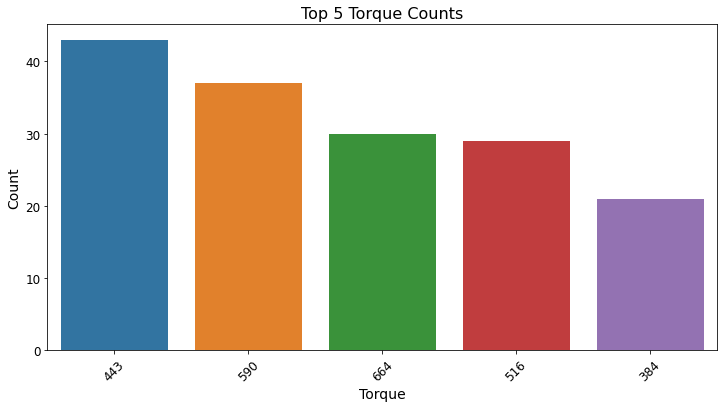

In [849]:
top_5_torque = car['Torque'].value_counts().head(5).index

# Filter the dataset for top 5 Torque values
filtered_car = car[car['Torque'].isin(top_5_torque)]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_car, x='Torque', order=top_5_torque)

# Add labels and title with custom font sizes
plt.title('Top 5 Torque Counts', fontsize=16)
plt.xlabel('Torque', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust x-axis label rotation for better readability (if needed)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

The top cars generally have high torque values, often exceeding 600 Nm (approximately 443 lb-ft). This indicates powerful performance and quick acceleration.

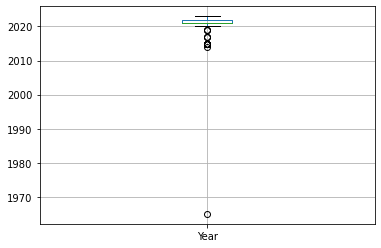

In [850]:
car.boxplot(column=['Year'])
plt.show()


 We can observe from the below of the boxplot that has one outlier its **Shelby Car Cobra model** from the year of  1965 

In [851]:
outliers = car[car['Year'] < car['Year'].quantile(0.25) - 1.5 * (car['Year'].quantile(0.75) - car['Year'].quantile(0.25))]
print(outliers)



          Car Name             Car Model  Year Engine Size Horsepower Torque  \
33   Mercedes-Benz               SLS AMG  2015         6.2        622    468   
43   Mercedes-Benz             CLS63 AMG  2019           4        603    627   
94   Mercedes-Benz               SLS AMG  2015         6.2        622    468   
159          Dodge                 Viper  2017         8.4        645    600   
170         Shelby                 Cobra  1965           7        435    440   
174       W Motors      Lykan Hypersport  2015         3.7        780    708   
181  Mercedes-Benz               SLS AMG  2015         6.2        622    468   
273  Mercedes-Benz  SLS AMG Black Series  2014         6.2        622    468   
369          Dodge                 Viper  2017         8.4        645    600   
405          Dodge             Viper ACR  2017         8.4        645    600   
464  Mercedes-Benz               SLS AMG  2015         6.2        622    468   
473       Maserati           GranTurismo

In [868]:
car_dk= car[car['Year'] <= 1970]  
print(car_dk)

    Car Name Car Model  Year Engine Size Horsepower Torque  MPH      Price
170   Shelby     Cobra  1965           7        435    440  4.2  1000000.0


In [854]:
outliers = car[car['Price'] > car['Price'].quantile(0.75) + 1.5 * (car['Price'].quantile(0.75) - car['Price'].quantile(0.25))]
print(outliers)


         Car Name      Car Model  Year     Engine Size Horsepower Torque  \
11        Bugatti         Chiron  2021               8       1500   1180   
14     Koenigsegg          Jesko  2021               5       1280   1015   
24         Pagani         Huayra  2021               6        720    737   
26          Rimac         Nevera  2022        Electric       1914   1696   
28    Lamborghini  Aventador SVJ  2021             6.5        759    531   
...           ...            ...   ...             ...        ...    ...   
988   Pininfarina       Battista  2021        Electric       1872   1696   
1002   Koenigsegg          Jesko  2022               5       1280   1106   
1003        Lotus          Evija  2021  Electric Motor       1972   1254   
1005       Pagani         Huayra  2021               6        764    738   
1006        Rimac         Nevera  2021  Electric Motor       1888   1696   

       MPH      Price  
11     2.4  3000000.0  
14     2.5  2800000.0  
24     2.8  280

In [856]:
car_df= car[car['Price'] <  3000000.0 ]  # Define an appropriate upper limit
print(car_df)

         Car Name Car Model  Year     Engine Size Horsepower Torque   MPH  \
0         Porsche       911  2022               3        379    331     4   
1     Lamborghini   Huracan  2021             5.2        630    443   2.8   
2         Ferrari   488 GTB  2022             3.9        661    561     3   
3            Audi        R8  2022             5.2        562    406   3.2   
4         McLaren      720S  2021               4        710    568   2.7   
...           ...       ...   ...             ...        ...    ...   ...   
998          Ford   Mustang  2021             2.3        310    350   5.3   
999        Nissan      370Z  2021             3.7        332    270   5.1   
1003        Lotus     Evija  2021  Electric Motor       1972   1254     2   
1005       Pagani    Huayra  2021               6        764    738     3   
1006        Rimac    Nevera  2021  Electric Motor       1888   1696  1.85   

          Price  
0      101200.0  
1      274390.0  
2      333750.0  
3  

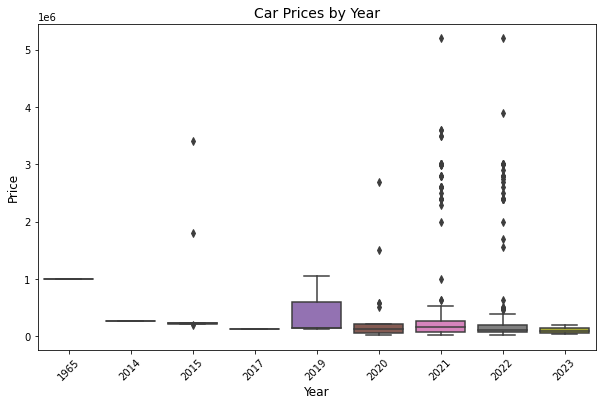

In [858]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=car, x='Year', y='Price')

plt.title('Car Prices by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.xticks(rotation=45)  
plt.show()

1)Almost every year has multiple outliers, representing cars priced much higher than the general distribution for that year. These could be luxury or special edition cars.

2)The dataset might include a mix of regular and premium cars for all years, leading to the observed outliers.

3)Most boxes are concentrated near the bottom, indicating lower-priced cars are more common.

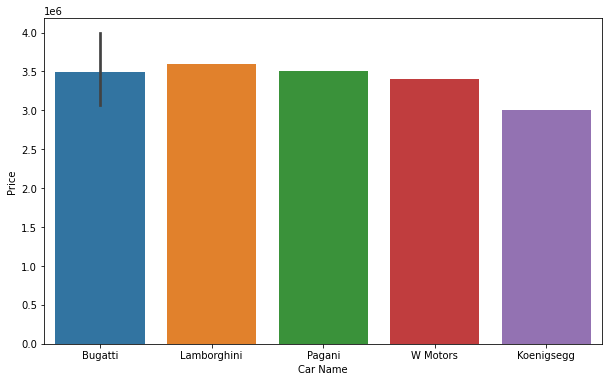

In [867]:
top_20_cars = car.nlargest(20, 'Price')

# Plot the top 10 cars with their prices
plt.figure(figsize=(10, 6))
sns.barplot(x='Car Name', y='Price', data=top_20_cars)
# Show the plot
plt.show()

Brands such as Bugatti, Koenigsegg, and Pagani appear multiple times, highlighting their strong presence in the ultra-luxury car market.

This could indicate these brands' success in marketing and selling high-value, exclusive cars.

In [860]:
# Assuming 'car' is your DataFrame
Q1 = car['Price'].quantile(0.25)  # 25th percentile
Q3 = car['Price'].quantile(0.75)  # 75th percentile

# Calculate IQR
IQR = Q3 - Q1

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')

Q1: 70100.0
Q3: 225000.0
IQR: 154900.0


Most car prices are clustered within  $70,100  to  $225,000. Prices outside this range can be considered outliers, indicating either very low or very high-end models.

In [ ]:
# Calculate Q1, Q3, and IQR for the 'Price' column
Q1 = car['Price'].quantile(0.25)
Q3 = car['Price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to get outliers
outliers = car[(car['Price'] < lower_bound) | (car['Price'] > upper_bound)]
print(outliers)


The output table shows the details of cars identified as outliers, including their names, models, years, engine sizes, horsepower, torque, 0-60 MPH time, and prices. Some examples from the output include:

Bugatti Chiron: Priced at $300000

Koenigsegg Jesko: Priced at $3200000

Pagani Huayra: Priced at $2800000

Rimac Nevera: Priced at $2400000

Lamborghini Aventador: Priced at $517770